<a href="https://colab.research.google.com/github/Azmain173/Resume-Screening-Using-Machine-Learning/blob/main/Resume_Screening_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Understand the Dataset
Download the dataset from Kaggle.
Load it into a Pandas DataFrame.
Check the structure using .head(), .info(), and .describe().
Identify key columns (e.g., Resume, Category).
Check for missing values and duplicates.

In [7]:
import pandas as pd

# Load the dataset
df = pd.read_csv("UpdatedResumeDataSet.csv")

# Explore the dataset
print(df.head())    # View first few rows
print(df.info())    # Check data types and missing values
print(df['Category'].value_counts())  # Check category distribution


       Category                                             Resume
0  Data Science  Skills * Programming Languages: Python (pandas...
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2  Data Science  Areas of Interest Deep Learning, Control Syste...
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB
None
Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40

Data Preprocessing
Text Cleaning: Remove stopwords, punctuation, numbers, and special characters.

Tokenization: Convert resumes into word tokens.

Lemmatization: Convert words to their base form.

Vectorization: Convert text into numerical form using TF-IDF or Word Embeddings (Word2Vec, FastText, or BERT).

Set the NLTK Data Path Manually
Sometimes, NLTK doesn't automatically find its data directory. You can set the NLTK data path manually in your code. Here's how you can do it:

In [11]:
import nltk

# Set the NLTK data path manually
nltk.data.path.append('/usr/nltk_data')

# Download necessary resources
nltk.download('punkt', download_dir='/usr/nltk_data')
nltk.download('stopwords', download_dir='/usr/nltk_data')
nltk.download('wordnet', download_dir='/usr/nltk_data')


[nltk_data] Downloading package punkt to /usr/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /usr/nltk_data...


True

Try to Install punkt Directly
If that still doesn’t resolve the issue, you could try installing the punkt tokenizer manually:

In [12]:
pip install nltk


Then, run this in Python:

In [13]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

This should directly install the punkt tokenizer. After running this, proceed with your script again.

3. Using a Local File for Tokenization
If you're still facing issues, an alternative is to avoid using nltk for tokenization and instead use a simple Python-based tokenizer.

Here’s an example of a basic tokenizer using regular expressions:

In [15]:
import re

def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    tokens = text.split()  # Tokenize by whitespace
    return " ".join(tokens)

# Apply preprocessing to your dataset
df['cleaned_resume'] = df['Resume'].apply(preprocess_text)


This would bypass NLTK entirely, and you can move ahead with your preprocessing.

Text Vectorization
Now that your text data is cleaned, you can convert it into a numerical format suitable for machine learning models. Use TF-IDF (Term Frequency-Inverse Document Frequency) to transform the resumes into a matrix of features.

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 features
X = vectorizer.fit_transform(df['cleaned_resume'])  # Transform the cleaned resume text into features
y = df['Category']  # Labels (job categories)


In [17]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model Selection and Training
You can try various models. Let's start with Logistic Regression and then evaluate others such as Random Forest or SVM.

Example with Logistic Regression:

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train a Logistic Regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9948186528497409
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         3
                     Arts       1.00      1.00      1.00         6
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       1.00      1.00      1.00         4
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      1.00      1.00         5
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         7
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.00        12
                   Hadoop       

Model Evaluation
Accuracy: Check how well the model is performing.
Classification Report: View precision, recall, and F1-score for each category.

project done. following are optional
****

 Hyperparameter Tuning (Optional)
To improve model performance, you can perform hyperparameter tuning using GridSearchCV or RandomizedSearchCV.

Example with GridSearchCV:

In [19]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'C': [0.1, 1, 10],  # Regularization strength
    'max_iter': [100, 500, 1000]  # Number of iterations for optimization
}

# Initialize GridSearchCV
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best model parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("Optimized Accuracy:", accuracy_score(y_test, y_pred_best))


Best Parameters: {'C': 1, 'max_iter': 100}
Optimized Accuracy: 0.9948186528497409


Model Saving (Optional)
After you’ve trained and evaluated your model, you can save it for later use using joblib or pickle.

In [20]:
import joblib

# Save the trained model
joblib.dump(best_model, 'resume_screening_model.pkl')

# Load the model later
# model = joblib.load('resume_screening_model.pkl')


['resume_screening_model.pkl']

 Making Predictions
Now that you have a trained model, you can use it to predict the category of a new resume.

In [21]:
# New resume text
new_resume = ["This is the resume content..."]

# Preprocess the new resume text
new_resume_cleaned = preprocess_text(new_resume[0])

# Vectorize the cleaned resume text
new_resume_vectorized = vectorizer.transform([new_resume_cleaned])

# Make the prediction
prediction = clf.predict(new_resume_vectorized)
print("Predicted Category:", prediction)


Predicted Category: ['Testing']


Visualization

Visualizing Resume Categories Distribution
To see the distribution of different job categories in the dataset:

<ipython-input-22-bd36afdad77b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Category'], order=df['Category'].value_counts().index, palette='coolwarm')


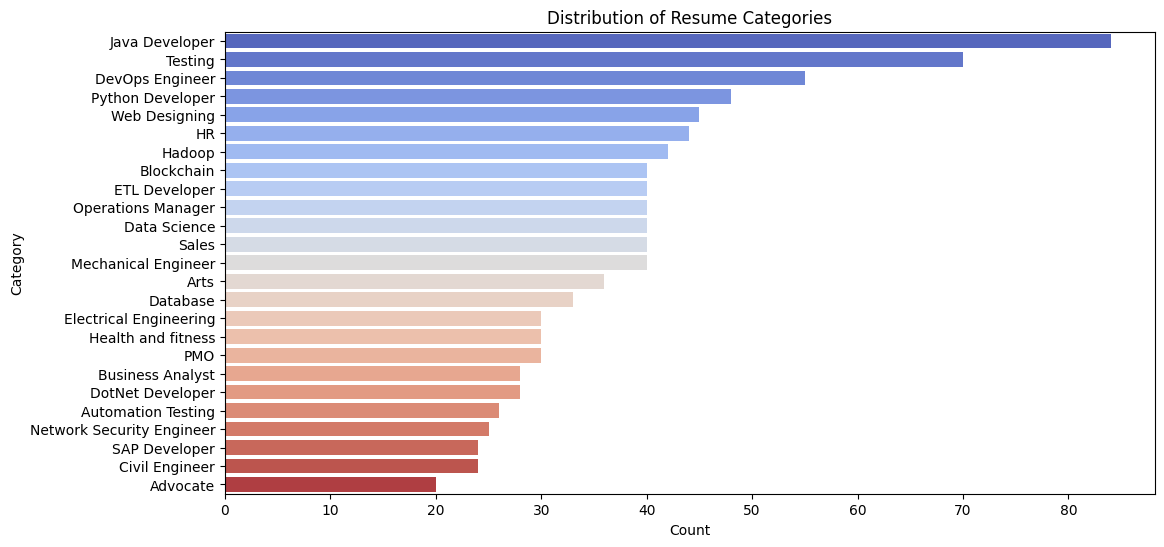

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot category distribution
plt.figure(figsize=(12, 6))
sns.countplot(y=df['Category'], order=df['Category'].value_counts().index, palette='coolwarm')
plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Distribution of Resume Categories')
plt.show()


Visualizing Most Common Words in Resumes (Word Cloud)
To identify frequently occurring words in resumes:

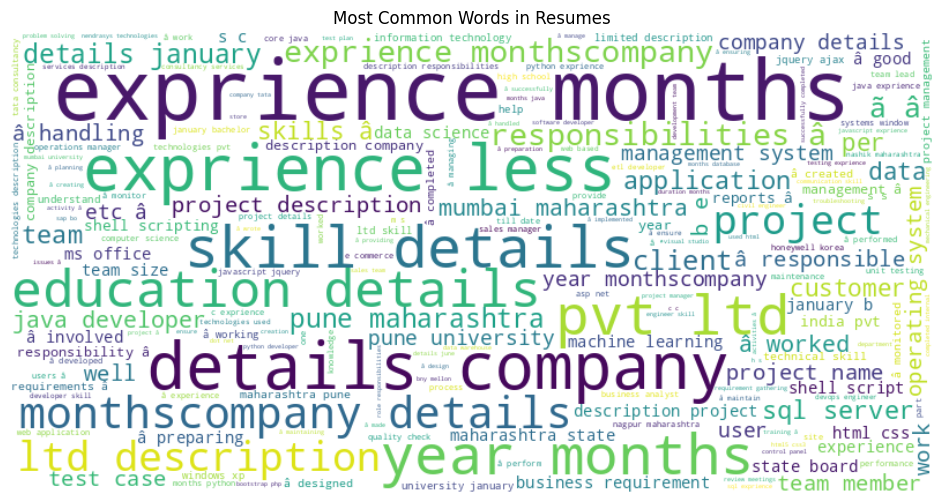

In [23]:
from wordcloud import WordCloud

# Join all cleaned resume text
text = " ".join(resume for resume in df['cleaned_resume'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Resumes')
plt.show()


Visualizing TF-IDF Scores of Top Words
To see which words have the highest importance in resumes:

<ipython-input-24-de2ea00b5a0d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tfidf_scores[sorted_indices], y=np.array(feature_names)[sorted_indices], palette="viridis")


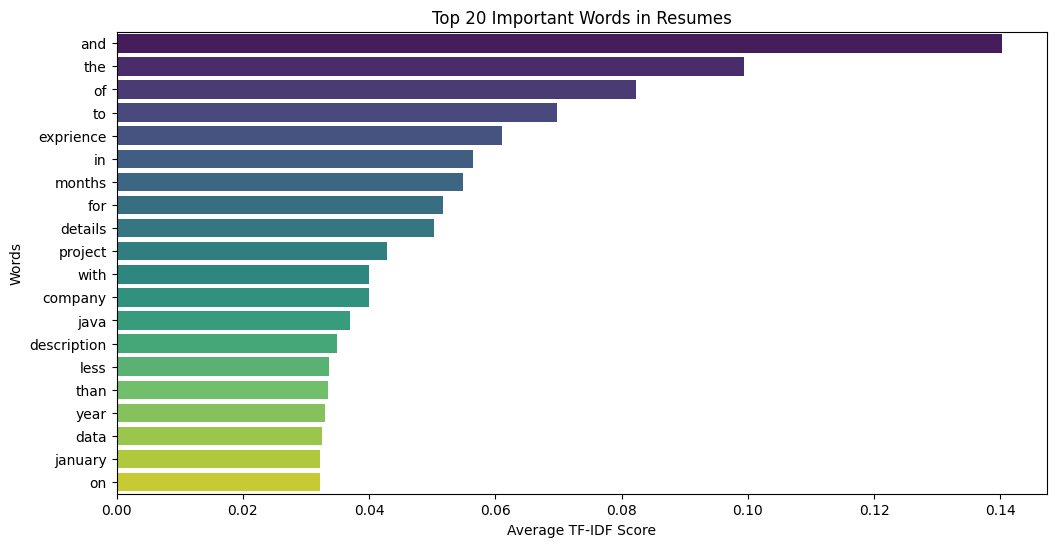

In [24]:
import numpy as np

# Get feature names and corresponding TF-IDF scores
feature_names = vectorizer.get_feature_names_out()
tfidf_scores = np.mean(X.toarray(), axis=0)

# Select top 20 words
top_n = 20
sorted_indices = np.argsort(tfidf_scores)[::-1][:top_n]

# Plot the top words
plt.figure(figsize=(12, 6))
sns.barplot(x=tfidf_scores[sorted_indices], y=np.array(feature_names)[sorted_indices], palette="viridis")
plt.xlabel('Average TF-IDF Score')
plt.ylabel('Words')
plt.title('Top 20 Important Words in Resumes')
plt.show()


Confusion Matrix (Model Performance)
To visualize how well your model is classifying resumes:

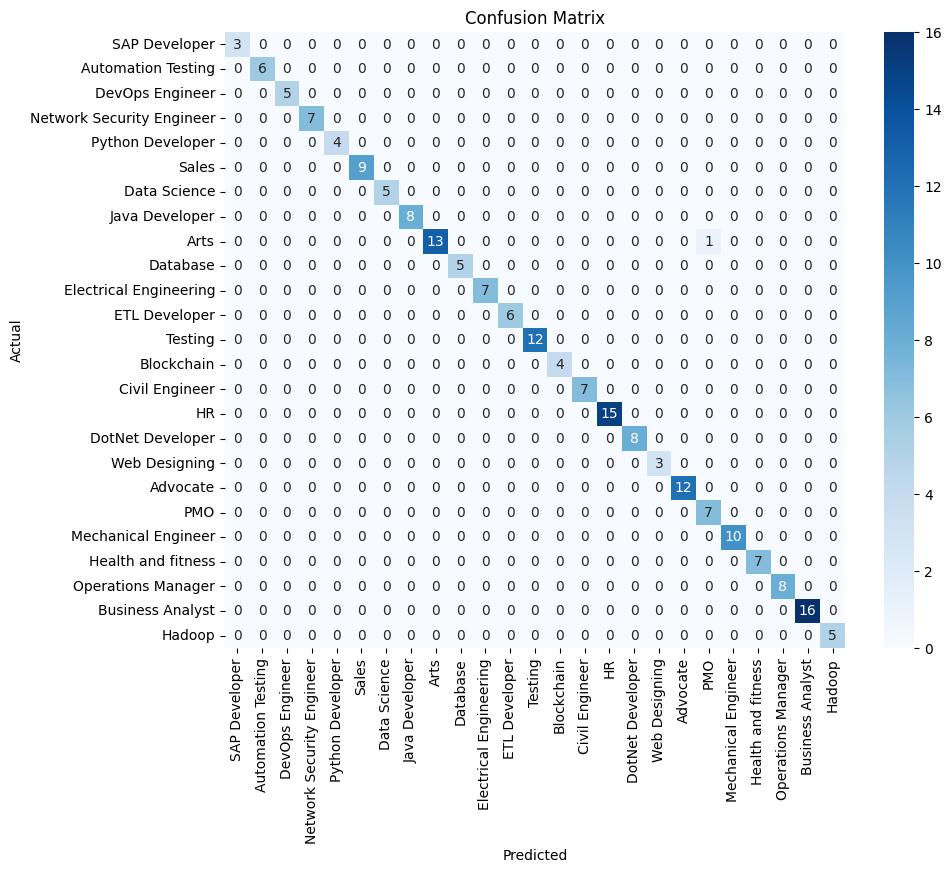

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


 Model Performance: Accuracy vs. Training Data Size
To analyze how accuracy changes as we increase training data:

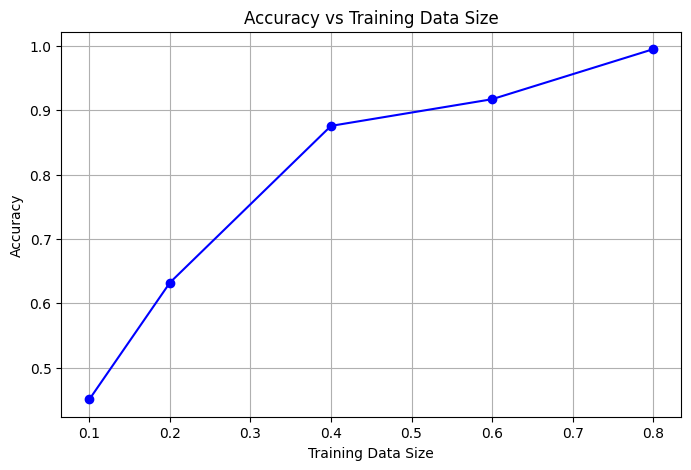

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

train_sizes = [0.1, 0.2, 0.4, 0.6, 0.8]  # Removing 1.0 to avoid errors
accuracies = []

for size in train_sizes:
    X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, train_size=size, random_state=42)
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_small, y_train_small)
    y_pred_small = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred_small))

# Plot results
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Training Data Size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Training Data Size')
plt.grid(True)
plt.show()
